# 데이터 전처리

In [7]:
import pandas as pd
import numpy as np

df = pd.read_csv('Position_Salaries.csv')

X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

- Position 열은 Level 열 값에 대한 명칭이므로, 해당 열은 독립 변수에서 제외함

In [8]:
print(df.isnull().sum())

Position    0
Level       0
Salary      0
dtype: int64


- 결측 데이터 없음
- 범주형 데이터 없음
- 데이터의 양이 너무 적은 관계로 모든 dataset을 train_set으로 사용할 것임

# 단순 선형 회귀

In [10]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

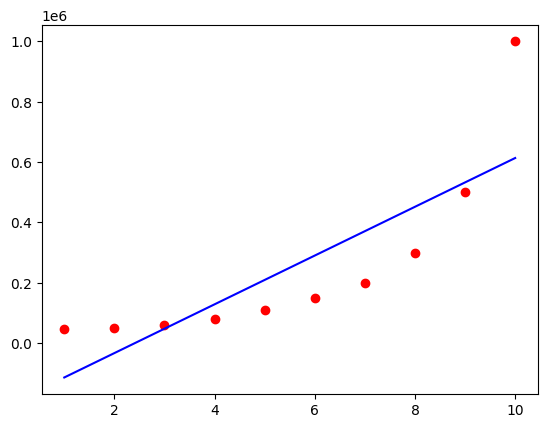

In [12]:
import matplotlib.pyplot as plt

plt.scatter(X, y, color='red')
plt.plot(X, regressor.predict(X), color='blue')

- 단순 선형 회귀 모델은 해당 데이터 세트에 적합하지 않음을 확인할 수 있음

# 다항식 회귀

In [16]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)

In [20]:
regressor = LinearRegression()
regressor.fit(X_poly, y)

LinearRegression()

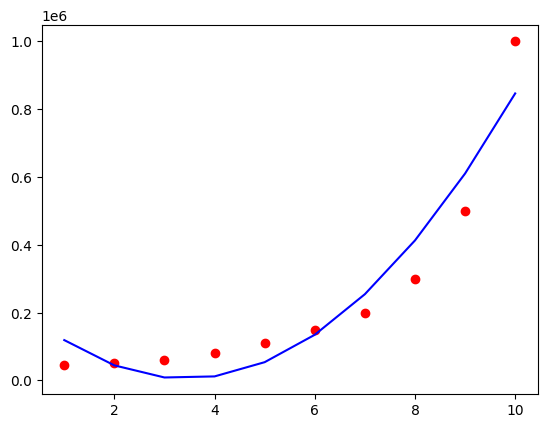

In [22]:
plt.scatter(X, y, color='red')
plt.plot(X, regressor.predict(X_poly), color='blue')

- 단순 선형 회귀의 예측 결과보다 산점도에 훨씬 근접한 회귀 곡선을 가짐
- $n$의 값이 높아지는 경우 그보다 더 나은 결과가 나오게 되지만, 과적합 문제가 발생할 수 있음

## 그래프를 완곡한 곡선으로 표현하기

<ipython-input-23-47283b11bcef>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1).reshape(-1, 1)


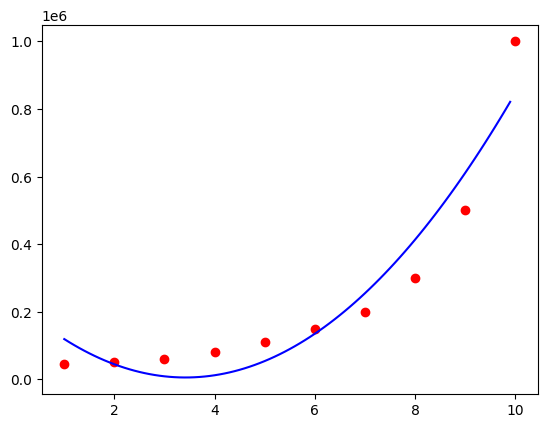

In [23]:
X_grid = np.arange(min(X), max(X), 0.1).reshape(-1, 1)
plt.scatter(X, y, color='red')
plt.plot(X_grid, regressor.predict(poly_reg.fit_transform(X_grid)), color='blue')